## Mentoría: Predicción de indicadores sociales para países del MERCOSUR

[Link a la descripción del proyecto](https://github.com/jfrau/DiploDatos2020/blob/master/README.md)

## Importacion de Librerías

In [72]:
import pandas as pd

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Para que pandas no trunque aquellas celdas con contenido muy largo (como textos)
pd.set_option('display.max_colwidth', -1)
# Para que pandas no trunque la vista de todas las columnas
pd.set_option('display.max_columns', None)


## Carga de datos

Cargamos los datasets de cada uno de los indicadores a predecir. Los mismos pueden descargarse del siguiente [link](https://drive.google.com/drive/folders/1NVxgmk_pED1FtnqWl_M4-2vRPiyd6Pri?usp=sharing).

In [107]:
education = pd.read_csv('educacion_mercosur_cleaned.csv')
gender = pd.read_csv('gender_mercosur_cleaned.csv')
environment = pd.read_csv('environment_mercosur_cleaned.csv')
health = pd.read_csv('health_mercosur_cleaned.csv')
poverty = pd.read_csv('poverty_mercosur_cleaned.csv')
social_protection = pd.read_csv('socialprotection_mercosur_cleaned.csv')

Veamos por ejemplo las primeras filas del dataset de Educación...

In [108]:
education.head(2)

,Unnamed: 0,Indicator,Country Name,Country Code,Indicator Code,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Población entre 15 y 64 años de edad (% del total),Education,Argentina,ARG,SP.POP.1564.TO.ZS,63.615666,63.527827,63.427855,63.313371,63.178718,63.018152,62.720914,62.388615,62.045511,61.730744,61.466255,61.12062,60.912521,60.785426,60.665943,60.525325,60.484758,60.371057,60.250572,60.213212,60.291595,60.288866,60.405903,60.599449,60.802085,60.983193,61.135755,61.291539,61.449641,61.620577,61.809169,62.020439,62.213434,62.402149,62.605267,62.828610,62.992290,63.199787,63.423789,63.621335,63.769017,63.880723,63.947129,63.982692,64.015470,64.060020,64.060567,64.083523,64.121277,NaN
1,Población entre 0 y 14 años de edad (% del total),Education,Argentina,ARG,SP.POP.0014.TO.ZS,29.438848,29.380490,29.347396,29.339782,29.361379,29.416802,29.581319,29.793933,30.028849,30.244546,30.416247,30.68159,30.809384,30.857175,30.901551,30.971679,30.905310,30.933192,30.979771,30.943174,30.786013,30.679114,30.452348,30.153352,29.857655,29.598630,29.356889,29.125647,28.905752,28.686628,28.462194,28.197937,27.971353,27.759564,27.533237,27.280011,27.065701,26.804888,26.522332,26.258970,26.035958,25.822270,25.651857,25.509966,25.368129,25.211165,25.079456,24.926770,24.760934,NaN


... y un muestreo aleatorio del dataset de Salud.

In [109]:
health.sample(2)

,Unnamed: 0,Indicator,Country Name,Country Code,Indicator Code,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
1320,Enfermeras y parteras (por cada 1.000 personas),Health,Suriname,SUR,SH.MED.NUMW.P3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4564,NaN,NaN,NaN,5.2269,NaN,NaN,NaN,NaN,3.0772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0983,NaN,NaN
323,"Prevalencia de VIH, varones (% entre 15 y 24 años de edad)",Health,Paraguay,PRY,SH.HIV.1524.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.1,0.1,0.1,0.2,0.2,0.3,0.4,0.4,0.5,0.5000,0.5,0.5,0.5,0.5000,0.4,0.4,0.4,0.3,0.3000,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2000,0.2,NaN


Como observamos, por cuestiones referidas al guardado del csv la primera columna no posee ningún nombre. La renombramos como ***Features*** en todos los datasets.

In [110]:
#Corección del nombre de la primera columna
education = education.rename(columns={"Unnamed: 0": "Features"})
gender = gender.rename(columns={"Unnamed: 0": "Features"})
environment = environment.rename(columns={"Unnamed: 0": "Features"})
health = health.rename(columns={"Unnamed: 0": "Features"})
poverty = poverty.rename(columns={"Unnamed: 0": "Features"})
social_protection = social_protection.rename(columns={"Unnamed: 0": "Features"})

Por último veamos las dimensiones de cada uno de los datasets considerados:

In [111]:
print('Dimensiones de los datasets: \n',
      'Educación:',education.shape, '\n', 
      'Género:',gender.shape,'\n',
     'Medio Ambiente:', environment.shape, '\n',
     'Salud:', health.shape, '\n',
      'Pobreza:',poverty.shape, '\n',
      'Protección Social:',social_protection.shape)

Dimensiones de los datasets: 
 Educación: (1272, 55) 
 Género: (996, 55) 
 Medio Ambiente: (912, 55) 
 Salud: (1344, 55) 
 Pobreza: (180, 55) 
 Protección Social: (1116, 55)


### Breve muestro estadístico

In [112]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 55 columns):
Features          996 non-null object
Indicator         996 non-null object
Country Name      996 non-null object
Country Code      996 non-null object
Indicator Code    996 non-null object
1970.0            267 non-null float64
1971.0            327 non-null float64
1972.0            311 non-null float64
1973.0            303 non-null float64
1974.0            307 non-null float64
1975.0            295 non-null float64
1976.0            304 non-null float64
1977.0            324 non-null float64
1978.0            304 non-null float64
1979.0            297 non-null float64
1980.0            264 non-null float64
1981.0            235 non-null float64
1982.0            231 non-null float64
1983.0            214 non-null float64
1984.0            249 non-null float64
1985.0            275 non-null float64
1986.0            290 non-null float64
1987.0            294 non-null float64
198

In [113]:
gender.describe(include='object')

,Features,Indicator,Country Name,Country Code,Indicator Code
count,996,996,996,996,996
unique,83,1,12,12,83
top,"Empleo vulnerable, mujeres (% del empleo femenino)",Gender,Paraguay,SUR,SE.PRM.CMPT.MA.ZS
freq,12,996,83,83,12


In [114]:
gender.describe(include='float')

,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
count,267.000000,327.000000,311.000000,303.000000,307.000000,295.000000,304.000000,324.000000,304.000000,297.000000,264.000000,235.000000,231.000000,214.000000,249.000000,275.000000,290.000000,294.000000,273.000000,238.000000,284.000000,636.000000,618.000000,648.000000,585.000000,619.000000,651.000000,596.000000,681.000000,772.000000,759.000000,751.000000,769.000000,752.000000,781.000000,824.000000,798.000000,825.000000,835.000000,872.000000,852.000000,873.000000,860.000000,799.000000,807.000000,805.000000,785.000000,756.000000,607.000000,340.000000
mean,3070.725406,748.889278,552.108538,771.666250,1156.919587,1581.743274,1178.669536,996.922583,934.526685,859.073386,938.459436,1795.894341,134.163296,355.478644,502.662184,312.451748,4486.404128,320.129477,314.707430,313.396708,233.902189,2200.233529,263.837849,681.383259,421.042620,1176.903429,338.466021,194.815816,298.323500,897.220445,712.149389,832.968505,600.203838,381.280899,1245.019528,351.416239,362.484716,1328.157105,553.869019,865.220892,538.852398,1187.407923,776.147141,535.511907,584.900127,754.170129,873.854447,826.383055,356.806444,33.480108
std,25513.141762,8098.923367,5476.803970,8675.474360,9582.902556,11200.964066,9865.145238,8380.859909,7856.479723,6586.765523,7555.308497,16246.008696,685.664072,2934.474845,3470.366705,2867.909595,50125.602609,3051.649782,2866.697607,2645.893927,2033.953504,32353.373528,2971.643340,9729.463709,4283.444628,15788.124203,3240.842812,1967.332722,3436.305356,10173.179375,8016.587350,10464.355075,8378.031150,4190.949654,17988.341517,4377.058892,4438.420410,20638.679532,5788.056914,9161.432936,4578.264578,12829.155655,7157.605944,5873.754162,6455.404006,7457.420292,9082.448234,9288.841691,3690.908330,24.842334
min,0.362750,0.248470,0.301900,0.344930,0.498160,0.483570,0.451560,0.624940,0.662620,0.559960,0.556870,0.765690,0.807870,0.700140,0.649920,0.769260,0.721710,0.804930,0.678680,0.917990,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.072000,0.033000,0.015000,0.058000,0.049000
25%,24.285485,23.894865,26.887430,28.330900,34.769140,34.281510,37.426603,42.175900,43.231097,36.592250,26.052140,43.998905,43.500680,44.183260,42.676590,37.024535,37.584542,41.306790,41.365970,38.184157,16.975000,14.985000,15.079000,13.979503,14.200000,14.603000,15.305000,12.416750,14.983000,15.835750,16.150000,15.497500,16.900000,16.854750,16.612000,16.449501,16.845999,16.242000,16.900000,18.134250,16.864500,16.770000,16.197750,16.149500,16.600000,16.809999,15.385000,14.287073,11.617500,10.025000
50%,59.256626,53.184520,53.940000,56.328403,58.894390,59.580000,62.311470,63.620647,63.608763,62.925580,62.631335,63.507754,62.801000,63.451755,63.887000,63.923000,63.800730,65.028302,65.351640,66.533543,63.450500,45.687500,46.268499,44.761499,42.590000,43.694270,46.000000,42.078011,47.917999,49.211995,49.105820,49.097070,49.079860,49.331901,50.602380,51.199999,51.446785,51.502998,52.174160,52.558500,52.195999,55.018998,53.208500,52.588060,53.382999,52.139000,51.277410,50.400999,44.950370,29.820001
75%,91.846250,79.933990,87.304145,85.887675,90.060655,87.803810,88.020820,93.099457,91.586295,89.326760,87.127392,91.764075,90.843810,88.959570,88.546440,88.073630,85.855517,90.172795,92.104240,94.637400,83.765484,74.403628,74.893110,74.236250,74.099300,76.094995,77.321429,74.358500,75.485001,78.405171,78.741573,77.322924,77.326000,78.722014,78.961998,79.722418,81.117185,82.150660,84.972923,85.549806,85.962978,87.462140,85.873073,85.030722,85.836140,

In [115]:
gender.dtypes

Features          object 
Indicator         object 
Country Name      object 
Country Code      object 
Indicator Code    object 
1970.0            float64
1971.0            float64
1972.0            float64
1973.0            float64
1974.0            float64
1975.0            float64
1976.0            float64
1977.0            float64
1978.0            float64
1979.0            float64
1980.0            float64
1981.0            float64
1982.0            float64
1983.0            float64
1984.0            float64
1985.0            float64
1986.0            float64
1987.0            float64
1988.0            float64
1989.0            float64
1990.0            float64
1991.0            float64
1992.0            float64
1993.0            float64
1994.0            float64
1995.0            float64
1996.0            float64
1997.0            float64
1998.0            float64
1999.0            float64
2000.0            float64
2001.0            float64
2002.0            float64
2003.0      

## Metadata

Cargamos ahora la metadata de cada una de las variables para cada indicador. La misma puede descargarse desde el siguiente [link](https://drive.google.com/drive/folders/11QPQHD_hxeMZZ-VH9ppM9KXL46HRxSjy?usp=sharing).

La metadata es una explicación breve sobre el significado de cada variable y la fuente de datos, en criollo podríamos decir que básicamente es un "Diccionario de datos". Estos datos deben ser tomados de consulta y para dar sentido a los valores o información hallada.

In [116]:
metadata_education = pd.read_csv('metadata_education.csv')
metadata_gender = pd.read_csv('metadata_gender.csv')
metadata_environment = pd.read_csv('metadata_environment.csv')
metadata_health = pd.read_csv('metadata_health.csv')
metadata_poverty = pd.read_csv('metadata_poverty.csv')
metadata_socialprotection = pd.read_csv('metadata_socialprotection.csv')

Inspeccionemos un poco de que se trata...

In [117]:
metadata_education.sample(2)

,Unnamed: 0,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
150,150,SE.ADT.1524.LT.ZS,"Tasa de alfabetización, total de jóvenes (% de personas entre 15 y 24 años)","Tasa de alfabetización juvenil (15-24) (%), total. Corresponde al número de personas de entre 15 y 24 años que son capaces de leer y escribir, con entendimiento, una proposición simple y breve sobre su vida diaria, dividido por la población en dicho grupo etáreo. En general, el término “alfabetización” incluye también las habilidades aritméticas, es decir la capacidad de hacer cálculos matemáticos sencillos.","Instituto de Estadística de la Organización de las Naciones Unidas para la Educación, la Ciencia y la Cultura (UNESCO)."
65,65,SE.SEC.ENRL.LO.TC.ZS,Relación alumno-maestro en el ciclo inferior de la escuela secundaria,Lower secondary school pupil-teacher ratio is the average number of pupils per teacher in lower secondary school.,"United Nations Educational, Scientific, and Cultural Organization (UNESCO) Institute for Statistics."


In [118]:
metadata_gender.sample(2)

,Unnamed: 0,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
123,123,SE.PRM.UNER.MA,"Niños que no asisten a la escuela, nivel primario, varones",Niños no escolarizados en edad oficial de cursar educación primaria. Corresponde al número total de niños en edad oficial de cursar educación primaria que no están matriculados en primaria ni en secundaria.,"Instituto de Estadística de la Organización de las Naciones Unidas para la Educación, la Ciencia y la Cultura (UNESCO)."
79,79,SG.NOD.CONS,La cláusula de no discriminación hace referencia al género en la constitución (1=sí,0=no),"Nondiscrimination clause mentions gender in the constitution is whether there is a nondiscrimination clause in the constitution which mentions gender. The answer to be “Yes,” the constitution must use either the word discrimination or the word nondiscrimination or even when there is a “clawback” provision granting exceptions to the nondiscrimination clause for certain areas of the law, such as inheritance, family and customary law. The answer is “No” if there is no nondiscrimination provision, or the nondiscrimination language is present in the preamble but not in an article of the constitution, or there is a provision that merely stipulates that the sexes are equal, or the sexes have equal rights and obligations. The answer is ""N/A"" if there is no nondiscrimination provision."


In [119]:
metadata_environment.sample(2)

,Unnamed: 0,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
98,98,EN.ATM.GHGT.KT.CE,Emisiones de gases de efecto invernadero totales (kt de equivalente de CO2),"Total greenhouse gas emissions in kt of CO2 equivalent are composed of CO2 totals excluding short-cycle biomass burning (such as agricultural waste burning and Savannah burning) but including other biomass burning (such as forest fires, post-burn decay, peat fires and decay of drained peatlands), all anthropogenic CH4 sources, N2O sources and F-gases (HFCs, PFCs and SF6).","Comisión Europea, Centro Común de Investigación (JRC)/Agencia de Evaluación Ambiental de los Países Bajos (PBL). Base de Datos de Emisiones para la Investigación Atmosférica Global (EDGAR), EDGARv4.2 FT2012: http://edgar.jrc.ec.europa.eu/."
119,119,EG.EGY.PRIM.PP.KD,Nivel de intensidad energética de la energía primaria (megajulios/PIB en USD según la PPA de 2011),"Access to electricity, rural is the percentage of rural population with access to electricity.","Banco Mundial, base de datos de Energía Sostenible para Todos (SE4ALL) del Marco de Seguimiento Mundial de SE4ALL liderado de forma conjunta por el Banco Mundial, la Agencia Internacional de la Energía y el Programa de Asistencia para la Gestión del Sector de Energía."


In [120]:
metadata_health.sample(2)

,Unnamed: 0,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
31,31,SP.POP.6064.MA.5Y,"Población de 50 a 64 años, varones (% de la población masculina)",Male population between the ages 60 to 64 as a percentage of the total male population.,Estimaciones del personal del Banco Mundial sobre la base de la distribución por edades/sexo de las Previsiones Demográficas Mundiales de la División de Población de las Naciones Unidas.
224,224,SH.DYN.MORT,"Tasa de mortalidad, menores de 5 años (por cada 1.000)","Menores de cinco años la tasa de mortalidad es la probabilidad por cada 1.000 que un recién nacido muera antes de cumplir cinco años de edad, si está sujeto a las tasas de mortalidad específicas por edad del año especificado.","Estimaciones elaboradas por el Grupo Interinstitucional para las Estimaciones sobre Mortalidad Infantil de las Naciones Unidas (Unicef, OMS, Banco Mundial, División de Población del Departamento de Asuntos Económicos y Sociales de las Naciones Unidas) en www.childmortality.org. La proyección de los datos proviene de las Previsiones Demográficas Mundiales de la División de Población de las Naciones Unidas; en algunos casos, es posible que no sean congruentes con los datos anteriores al año actual."


In [121]:
metadata_poverty.sample(2)

,Unnamed: 0,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
23,23,SI.DST.02ND.20,Participación en el ingreso del segundo quintilo (20%) de la población en orden decreciente de remuneraciones,"La participación porcentual en el ingreso o en el consumo es la participación que se devenga a subgrupos de población representados en deciles o quintiles. Las participaciones porcentuales por quintil pueden no sumar el 100%, a causa del redondeo.","Banco Mundial, Grupo de investigaciones sobre el desarrollo. Los datos se basan en datos primarios obtenidos de encuestas de hogares de los organismos de estadística del gobierno y los departamentos de país del Banco Mundial. Los datos para las economías de ingreso alto provienen de la base de datos del Luxembourg Income Study (estudio de Ingreso de Luxemburgo). Puede obtener más información y datos sobre metodología véase PovcalNet (http://iresearch.worldbank.org/PovcalNet/index.htm).",NaN
18,18,SI.DST.FRST.10,Participación en el ingreso del 10% peor remunerado de la población,La participación porcentual en el ingreso o en el consumo es la participación que se devenga a subgrupos de población representados en deciles o quintiles.,"Banco Mundial, Grupo de investigaciones sobre el desarrollo. Los datos se basan en datos primarios obtenidos de encuestas de hogares de los organismos de estadística del gobierno y los departamentos de país del Banco Mundial. Los datos para las economías de ingreso alto provienen de la base de datos del Luxembourg Income Study (estudio de Ingreso de Luxemburgo). Puede obtener más información y datos sobre metodología véase PovcalNet (http://iresearch.worldbank.org/PovcalNet/index.htm).",NaN


In [122]:
metadata_socialprotection.sample(2)

,Unnamed: 0,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
141,141,per_sa_allsa.cov_q1_tot,Cobertura de los programas de medidas de protección social en el quintil más pobre (% de la población),"Coverage of social safety net programs shows the percentage of population participating in cash transfers and last resort programs, noncontributory social pensions, other cash transfers programs (child, family and orphan allowances, birth and death grants, disability benefits, and other allowances), conditional cash transfers, in-kind food transfers (food stamps and vouchers, food rations, supplementary feeding, and emergency food distribution), school feeding, other social assistance programs (housing allowances, scholarships, fee waivers, health subsidies, and other social assistance) and public works programs (cash for work and food for work). Estimates include both direct and indirect beneficiaries.","ASPIRE: El Atlas de Protección Social: Indicadores de Resiliencia y Equidad, Banco Mundial. Los datos proceden de encuestas de hogares nacionales representativas. (datatopics.worldbank.org/aspire/)"
60,60,SL.TLF.0714.WK.TM,"Horas de trabajo promedio de niños, solo trabajo, de 7 a 14 años (horas por semana)",Average working hours of children working only refers to the average weekly working hours of those children who are involved in economic activity and not attending school.,"Proyecto Understanding Children's Work, a partir de los datos de la OIT, Unicef y el Banco Mundial."


Como observamos el punto en común entre la metadata y los conjuntos de datos es a través de las columnas **INDICATOR_CODE** e **INDICATOR_NAME**.

## Construcción de un único dataset

Dado que dependiendo el análisis muchas veces será conveniente tener toda la información condensada en un solo lugar construimos un dataset con toda la info.

In [123]:
dataset =pd.concat([education, gender, environment, health, poverty, social_protection])
dataset.shape

(5820, 55)

In [124]:
#Para convertirlo a csv
#dataset.to_csv('dataset.csv')

In [125]:
dataset.columns

Index(['Features', 'Indicator', 'Country Name', 'Country Code',
       'Indicator Code', '1970.0', '1971.0', '1972.0', '1973.0', '1974.0',
       '1975.0', '1976.0', '1977.0', '1978.0', '1979.0', '1980.0', '1981.0',
       '1982.0', '1983.0', '1984.0', '1985.0', '1986.0', '1987.0', '1988.0',
       '1989.0', '1990.0', '1991.0', '1992.0', '1993.0', '1994.0', '1995.0',
       '1996.0', '1997.0', '1998.0', '1999.0', '2000.0', '2001.0', '2002.0',
       '2003.0', '2004.0', '2005.0', '2006.0', '2007.0', '2008.0', '2009.0',
       '2010.0', '2011.0', '2012.0', '2013.0', '2014.0', '2015.0', '2016.0',
       '2017.0', '2018.0', '2019.0'],
      dtype='object')

In [126]:
dataset.head(3)

,Features,Indicator,Country Name,Country Code,Indicator Code,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Población entre 15 y 64 años de edad (% del total),Education,Argentina,ARG,SP.POP.1564.TO.ZS,63.615666,63.527827,63.427855,63.313371,63.178718,63.018152,62.720914,62.388615,62.045511,61.730744,61.466255,61.12062,60.912521,60.785426,60.665943,60.525325,60.484758,60.371057,60.250572,60.213212,60.291595,60.288866,60.405903,60.599449,60.802085,60.983193,61.135755,61.291539,61.449641,61.620577,61.809169,62.020439,62.213434,62.402149,62.605267,62.828610,62.992290,63.199787,63.423789,63.621335,63.769017,63.880723,63.947129,63.982692,64.015470,64.060020,64.060567,64.083523,64.121277,NaN
1,Población entre 0 y 14 años de edad (% del total),Education,Argentina,ARG,SP.POP.0014.TO.ZS,29.438848,29.380490,29.347396,29.339782,29.361379,29.416802,29.581319,29.793933,30.028849,30.244546,30.416247,30.68159,30.809384,30.857175,30.901551,30.971679,30.905310,30.933192,30.979771,30.943174,30.786013,30.679114,30.452348,30.153352,29.857655,29.598630,29.356889,29.125647,28.905752,28.686628,28.462194,28.197937,27.971353,27.759564,27.533237,27.280011,27.065701,26.804888,26.522332,26.258970,26.035958,25.822270,25.651857,25.509966,25.368129,25.211165,25.079456,24.926770,24.760934,NaN
2,"Desempleo, total (% de la población activa total) (estimación modelado OIT)",Education,Argentina,ARG,SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.440000,6.360000,10.100000,11.760000,18.799999,17.110001,14.820000,12.650000,14.050000,15.000000,17.320000,19.590000,15.360000,13.522000,11.506000,10.077000,8.470000,7.837000,8.645000,7.714000,7.180000,7.217000,7.100000,7.268000,7.750000,7.977000,8.347000,9.220000,9.789


In [127]:
dataset.sample(3)

,Features,Indicator,Country Name,Country Code,Indicator Code,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
703,"Perseverancia en la escuela hasta el último grado del nivel primario, varones (% de la cohorte)",Education,Chile,CHL,SE.PRM.PRSL.MA.ZS,78.18969,69.08485,69.92444,70.20064,66.83409,64.96401,71.01590,NaN,NaN,NaN,NaN,NaN,89.96564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.88665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.23120,98.00775,NaN,99.13009,99.26806,98.84956,99.20548,NaN,NaN,NaN
679,"Educación de nivel secundario, alumnos en programas de educación general (% de mujeres)",Education,Chile,CHL,SE.SEC.ENRL.GC.FE.ZS,52.72192,52.60805,52.91204,53.45450,53.91620,53.65758,53.85952,53.14006,53.06192,52.90172,52.61678,52.67347,51.92238,51.22912,50.86642,50.96172,50.77705,NaN,NaN,51.05008,51.54405,50.17269,50.64786,51.60197,NaN,NaN,NaN,NaN,51.29311,51.22648,50.74295,NaN,50.55203,50.63899,50.60238,50.51727,50.56264,50.64234,50.54909,50.52094,50.64445,50.63138,50.8205,50.07645,50.06413,50.03049,50.04602,50.02919,NaN,NaN
740,Las emisiones de CO2 derivadas del consumo de combustible líquido ( % del total),Environment,Guyana,GUY,EN.ATM.CO2E.LF.ZS,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.0,100.0,100.00000,100.00000,100.00000,100.00000,100.00000,100.0,100.0,100.00000,100.0,100.00000,100.00000,100.00000,100.0,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.0000,100.00000,100.00000,NaN,NaN,NaN,NaN,NaN


In [128]:
dataset['Country Name'].unique()

array(['Argentina', 'Brasil', 'Paraguay', 'Uruguay', 'Venezuela',
       'Bolivia', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Perú',
       'Suriname'], dtype=object)

## Consignas

### Parte I: Análisis estadístico 

#### Por Indicadores segmentado por país 

El objetivo de esta primera parte es realizar un **estudio profundo, riguroso y detallado a nivel estadístico** de las variables dentro de cada indicador y para cada país en particular, se recomienda utilizar los datasets por indicador.

Para realizar el mismo se disponen de las siguientes preguntas y consignas de guía pero las mismas no son limitantes pues toda información que sume al conocimiento del dataset será de utilidad en los siguientes prácticos y hasta el final de la mentoría. Cada respuesta debe ser debidamente argumentada.

1. ¿Cuántos **tipos de Features diferentes** existen por indicador considerado? ¿Todos los países mantienen esa misma cantidad para el mismo indicador?
2.  ¿Cuál es la **proporción de valores nulos** para cada Feature dentro de cada Indicador con respecto al intervalo temporal considerado? ¿Estos valores nulos se encuentran dispersos a lo largo de todo el intervalo temporal o existen agrupamientos (más chicos y/o más grandes) de los mismos? ¿Qué decisión se podría tomar con respecto a los mismos en un futuro?
3. ¿Cómo es la **distribución de valores nulos por año** (por columnas del dataset)?. Teniendo en cuenta que el objetivo final de la mentoría es realizar una predicción de cada Feature para el año 2019, ¿se disponen de datos suficientes para comparar las predicciones que se obtendrán con el valor real en ese año?
4. Volviendo a los resultados del punto 2, elegir como **mínimo 15 Features por Indicador con al menos el 50% de valores no nulos** (y en lo posible los mismos para todos los países) y mostrar gráficamente, con gráficos de distribución o de cajas por ejemplo, la distribución de los mismos. ¿Qué se puede observar de estas distribuciones? ¿Son normales? ¿Qué sucede con los outliers? ¿Observan alguna similitud entre los features elegidos?. Para estos mismos 15 Features realizar el gráfico de línea de su serie temporal y analizarlo.
5. Elegir un Indicador de su interés y 5 features relacionados al mismo, también de su interés, y trazar la serie temporal sus valores a lo largo de los años. ¿Se observa alguna tendencia o algún patrón que se repite cada tanto?
6. **Pregunta de respuesta abierta y libre:** ¿Qué herramientas estadísticas aprendidas en clase (cálculo de estadísticos, test de hipótesis, probabilidad condicional, etc.) podría ayudar en el análisis de este dataset y el objetivo planteado? 

En base a las respuestas de los puntos anteriores:

7. ¿Existen similitudes y/o diferencias entre los diferentes países considerados? Justifique su respuesta utilizando los datos del análisis previo.

#### Comparación entre Indicadores

8. ¿Existen Features compartidos entre los diferentes Indicadores? En caso de respuesta afirmativa, los valores y la distribución es la misma para cada país? ¿Qué conclusión se podría sacar acerca de que un Feature tenga dos o más indicadores asociados?


### Parte II: Preguntas disparadoras desde el punto de vista social:

**OBLIGATORIAS**

1. ¿Qué pueden decir acerca de los valores nulos y no nulos presentes en aquellos Features relacionados con el rol de la mujer y con grupos históricamente marginados? ¿De qué manera cree que el contexto social se refleja en los valores del dataset?

2. ¿Qué conclusiones a nivel social puede sacar de todo lo analizado hasta el momento? ¿Qué considera que sería interesante seguir indagando o explorando?

**OPCIONALES**

1. ¿Existe alguna similitud entre los diferentes indicadores analizados ya sea considerando el comportamiento de un mismo indicador para todos los países o comparando el comportamiento de los indicadores entre sí?

2. ¿Existirá algún tipo de correlación entre los Features de un indicador? ¿Qué herramientas estadísticas aprendidas en clase podría utilizar para responder la pregunta anterior?

## Presentación de resultados 

Realizar un informe en formato notebook, o el que se considere más apropiado, en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañeros de clase). 

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de la materia "Análisis y Visualización". Asimismo, el mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles accionar a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.


## Fecha de entrega

- Semana 22/06/2020: Reunión para mostrar avances, resolver dudas y afinar cuestiones del análisis.
- Semana 29/06/2020: Entrega del práctico. El mismo debe estar subido al [repositorio](https://github.com/jfrau/DiploDatos2020) en la carpeta "Entregas".

## Extra: Info de utilidad sobre visualización en python

Las siguientes imágenes, que pueden encontrarse [aquí](https://matplotlib.org/_images/anatomy.png) y [aquí](/media/fig_map.bc8c7cabd823.png) dan un pantallazo general de la estructura y opciones personalización de un gráfico.

<table><tr>
<td> <img src="https://matplotlib.org/_images/anatomy.png" alt="Drawing" style="width: 400px"/> </td>
<td> <img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" alt="Drawing" style="width: 400px height:30px;"/> </td>
</tr></table>

Además, dado que el análisis en este práctico implica realizar muchos gráficos y llevar a cabo comparaciones entre los mismos, los subplots se vuelven en una herramienta bastante útil. A continuación, algunos ejemplos de código que pueden servir al momento de realizar los mismos.

<code>plt.subplots()</code> de la librería matplotlib crea una figura y una grilla de subfiguras (que puede pensarse como una matriz con m filas y n columnas) y permite un buen control de los gráficos individuales. Más info disponible en este [link](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html)

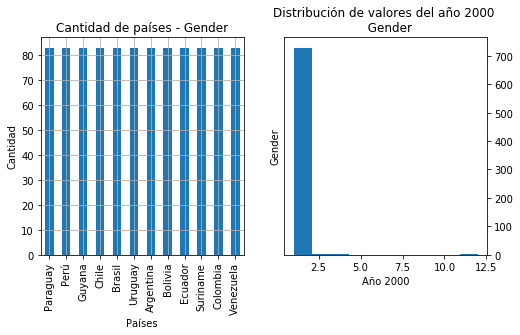

In [129]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4)) # OTRA FORMA
fig.subplots_adjust(wspace=.2) 

gender['Country Name'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Cantidad de países - Gender')
ax1.set_xlabel('Países')
ax1.set_ylabel('Cantidad')
ax1.grid()

gender['2017.0'].value_counts().plot(kind='hist',ax=ax2)
ax2.set_title('Distribución de valores del año 2000 \n  Gender')
ax2.set_xlabel('Año 2000')
ax2.set_ylabel('Gender')
ax2.yaxis.tick_right()

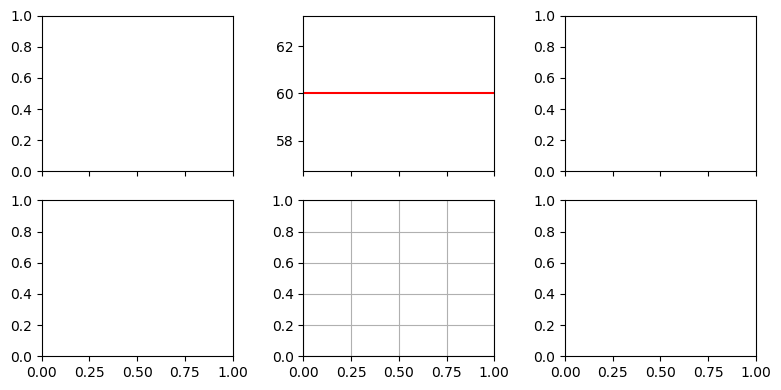

In [130]:
fig, axes = plt.subplots(2,3 ,figsize=(8,4), dpi=100, sharex=True)
axes[0,1].axhline(y=60, color='r', linestyle='-')
axes[1,1].grid()
plt.tight_layout()

El siguiente gráfico se encuentra en [https://www.python-course.eu/matplotlib_subplots.php](https://www.python-course.eu/matplotlib_subplots.php) junto con muchos otros ejemplos.

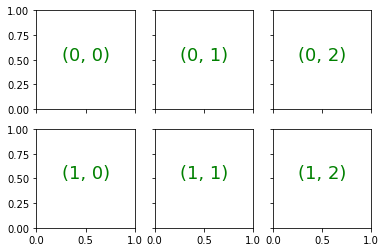

In [131]:
rows, cols = 2, 3
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row')

for row in range(2):
    for col in range(3):
        ax[row, col].text(0.5, 0.5, 
                          str((row, col)),
                          color="green",
                          fontsize=18, 
                          ha='center')


<code>plt.subplot2grid()</code> de la librería matplotlib crea un eje y locaciones específicas en una grilla regular.

 Más info disponible en este [link](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot2grid.html)

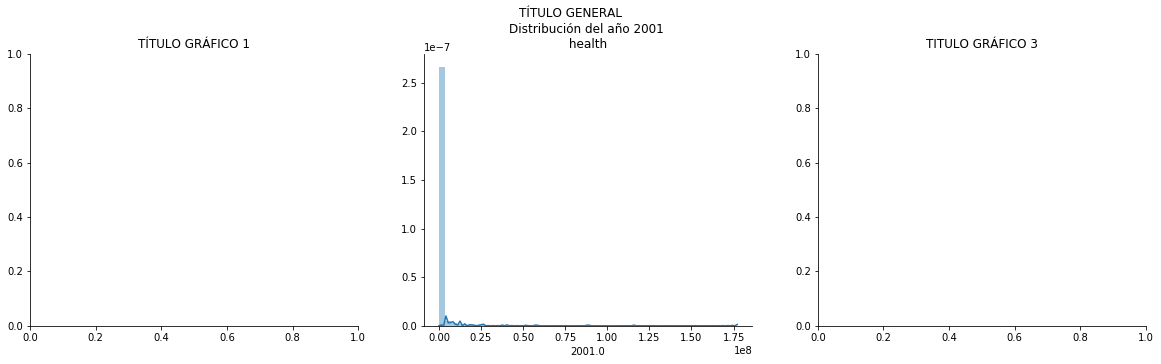

In [132]:
fig = plt.figure(figsize=(20,5))
#Gráfico 1
plt.subplot2grid((1,3),(0,0))
plt.title('TÍTULO GRÁFICO 1')
#Gráfico 2
plt.subplot2grid((1,3),(0,1))
sns.distplot(health['2001.0'].dropna())
plt.title('Distribución del año 2001 \n health ')
#Gráfico 3
plt.subplot2grid((1,3),(0,2))
fig.suptitle('TÍTULO GENERAL', y=1.01) 
plt.title('TITULO GRÁFICO 3')
sns.despine()